# Time series  forecasting  using LSTM model

* Time-series is sequnetial in nature and it is always in order
* 

# Libraries and Models

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM , Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, LSTM , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping


# 1. Load Data set

In [29]:
datafile = pd.read_csv("apple_data.csv")
datafile.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


# 2. Pre-proccessing data

## 2.1) Missing values checking

In [30]:
datafile.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

* We can see that there are `no missing values` in this data set

# 2.2) Information of data set

In [31]:
datafile.shape

(10468, 7)

* There are `10468 records` and `7 column` in this data set

In [32]:
datafile.size

73276

In [33]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


## 2.3) Changing data type of Date column

In [34]:
datafile["Date"] = pd.to_datetime(datafile["Date"])

In [35]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10468 non-null  datetime64[ns]
 1   Open       10468 non-null  float64       
 2   High       10468 non-null  float64       
 3   Low        10468 non-null  float64       
 4   Close      10468 non-null  float64       
 5   Adj Close  10468 non-null  float64       
 6   Volume     10468 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 572.6 KB


## 2.4) Changing index to Date column

In [36]:
datafile.set_index("Date",inplace=True)

In [37]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10468 entries, 1980-12-12 to 2022-06-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10468 non-null  float64
 1   High       10468 non-null  float64
 2   Low        10468 non-null  float64
 3   Close      10468 non-null  float64
 4   Adj Close  10468 non-null  float64
 5   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 572.5 KB


## 2.5) Sort the index column in dataset

In [38]:
datafile.sort_index(inplace=True)

In [39]:
datafile.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


# 2.6) Normalization 

In [40]:
scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(datafile[datafile.columns])

In [41]:
scaler_data

array([[4.30950014e-04, 4.33270567e-04, 4.42511906e-04, 4.35483696e-04,
        3.40815838e-04, 6.31981003e-02],
       [3.97331936e-04, 3.96658463e-04, 4.05118893e-04, 3.98684579e-04,
        3.12018225e-04, 2.36989104e-02],
       [3.48427437e-04, 3.47836857e-04, 3.55255959e-04, 3.49613594e-04,
        2.73615897e-04, 1.42459064e-02],
       ...,
       [7.35239774e-01, 7.50670228e-01, 7.37757535e-01, 7.44010911e-01,
        7.46069029e-01, 1.23332565e-02],
       [7.23135563e-01, 7.23604845e-01, 7.20334206e-01, 7.14499102e-01,
        7.16477939e-01, 1.45687326e-02],
       [7.12126738e-01, 7.27377614e-01, 7.24634207e-01, 7.22742631e-01,
        7.24743614e-01, 1.80712734e-02]])

## 2.7) Scaler data to pandas DataFrame

In [42]:
scaler_df = pd.DataFrame(scaler_data, columns=datafile.columns , index= datafile.index)

In [43]:
scaler_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.000431,0.000433,0.000443,0.000435,0.000341,0.063198
1980-12-15,0.000397,0.000397,0.000405,0.000399,0.000312,0.023699
1980-12-16,0.000348,0.000348,0.000355,0.000350,0.000274,0.014246
1980-12-17,0.000361,0.000363,0.000371,0.000365,0.000286,0.011647
1980-12-18,0.000379,0.000381,0.000390,0.000383,0.000300,0.009897


# 3) Plotting the column

* using ploting data, we can analysis whether, there is a seasonal trend or stationary or upward trend/downward trend or pattern in dataset

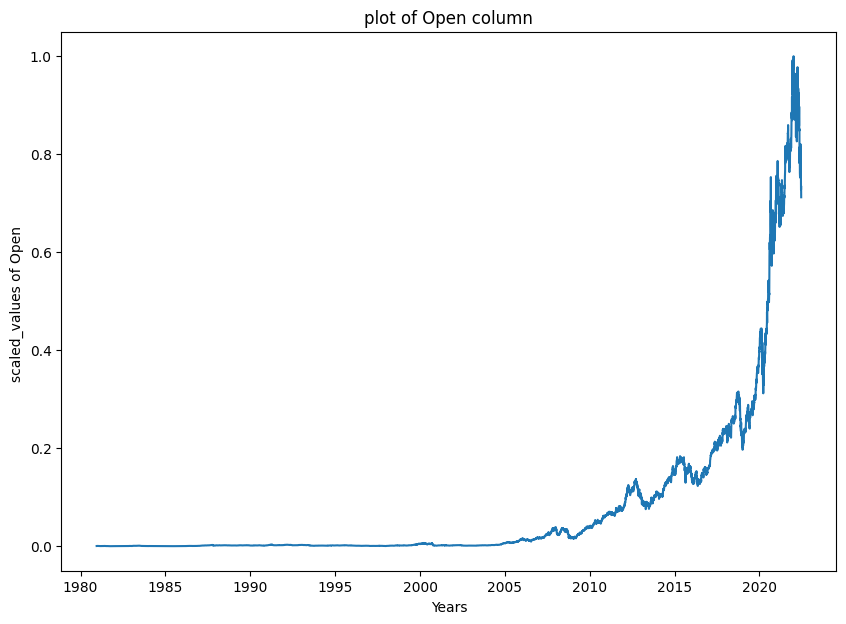

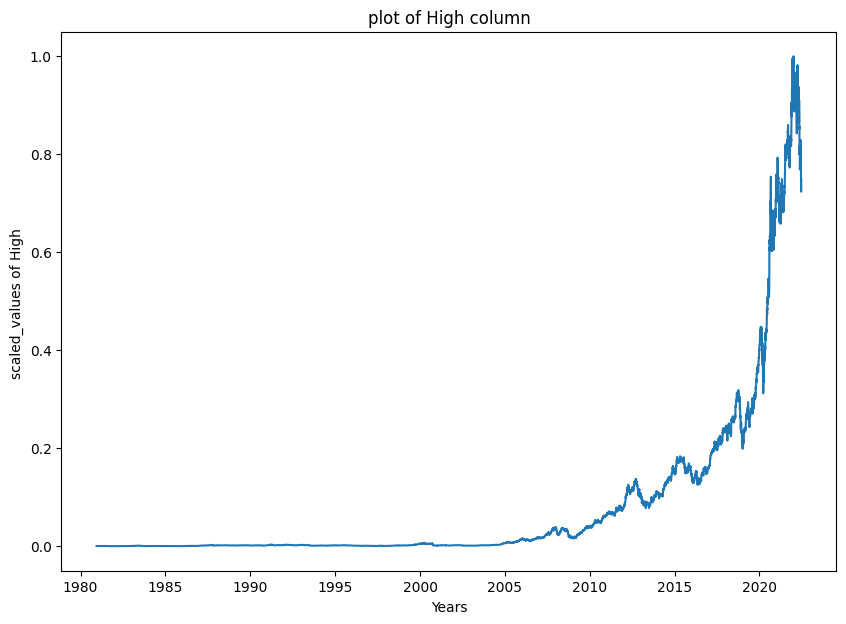

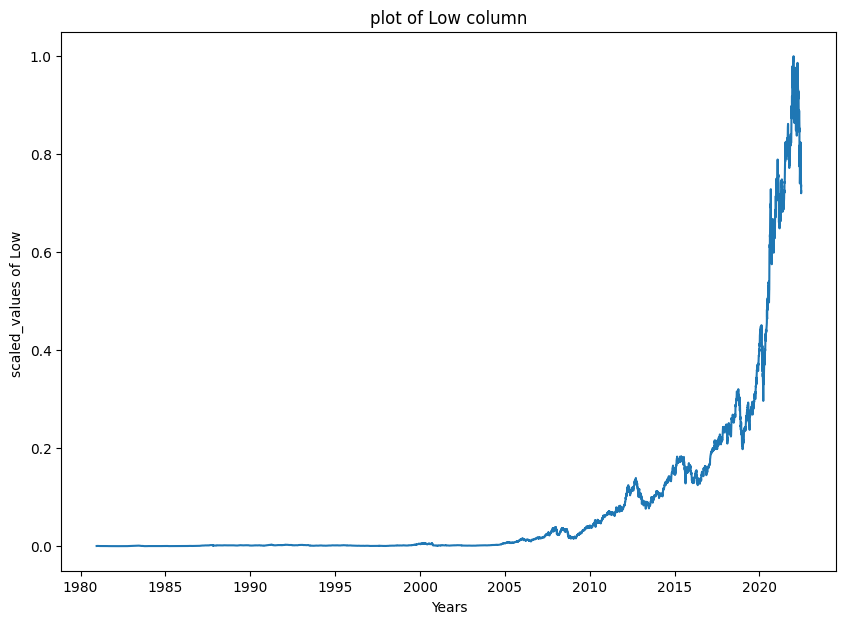

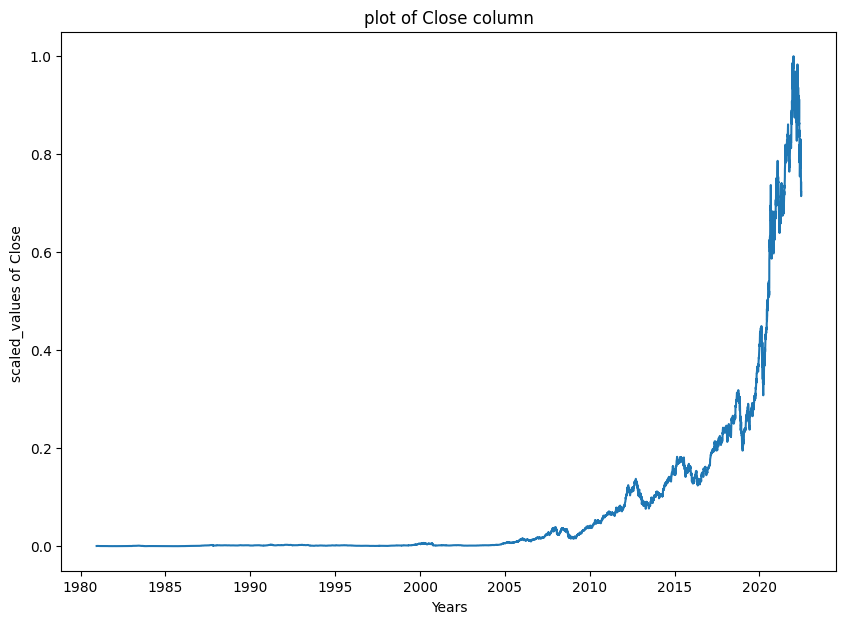

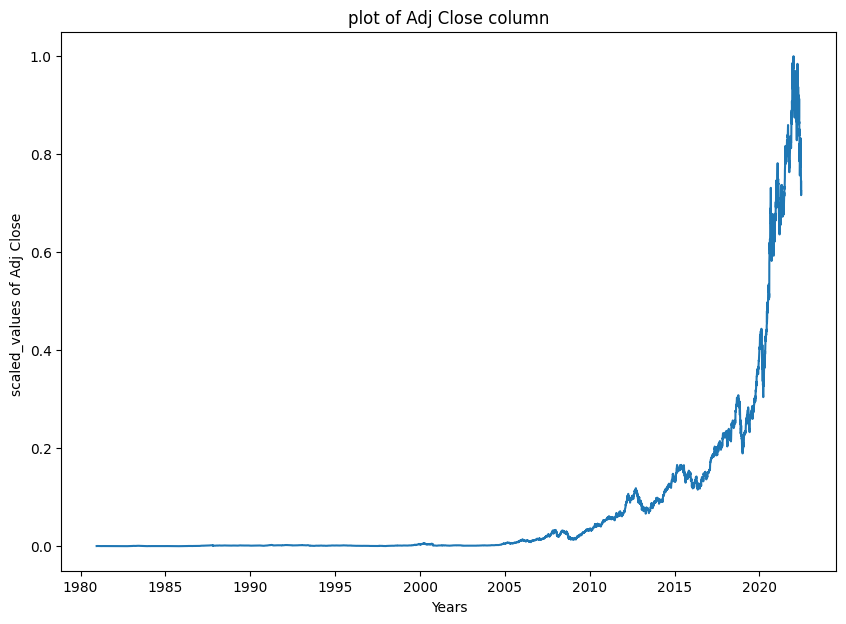

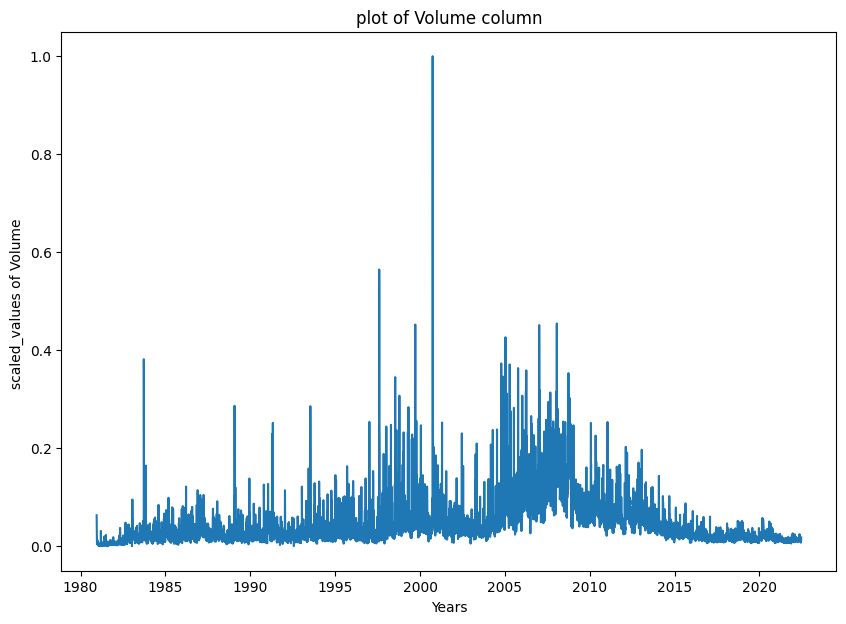

In [44]:
col_names =scaler_df.columns

for i in col_names:
    plt.figure(figsize=(10,7))
    plt.plot(scaler_df[i])
    plt.title(f"plot of {i} column")
    plt.ylabel(f"scaled_values of {i} ")
    plt.xlabel("Years")
    plt.show()


In [45]:
scaler_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

### Some interpretation of above plot

* Varibles for  `'Open', 'High', 'Low', 'Close', 'Adj Close' have approximately same plots`.
* but, final plot for `variable  'Volume' is different from other all variable`.

# 4) Sliding Window Sequence 

### what is the `Sliding Window Sequence` ?

* Sliding Window Sequence is a  technique where the time series data is segmented into overlapping fixed-length sequences (windows) to create input-output pairs for supervised learning.
* It involves some window which is  Fixed size of consecutive past observation. These observation are taken as input feature.using these input, it predicts next output.

Ex:
* window size = 4
* Let's take time states : 1,2,3,4...10

    *   [1,2,3,4] ==> [5]
    *   [2,3,4,5] ==> [6]
    *   [3,4,5,6] ==> [7]
    *   [4,5,6,7] ==> [8]

* from this method, we can convert original time series data into supervised learning problem suitable for models like LSTM.




In [46]:
def create_sequence(dataframe , window_size):
    x = []
    y = []

    for i in range(window_size, len(dataframe)):
        x.append(dataframe.iloc[i-window_size:i].values)
        y.append(dataframe.iloc[i].values)
    return np.array(x) , np.array(y)

    

In [47]:
window_size = 500
x ,y = create_sequence(scaler_df, window_size)

In [48]:
x.shape , y.shape

((9968, 500, 6), (9968, 6))

* Interpretation : in x array, there are single list of 500 sequences.

In [49]:
x

array([[[4.30950014e-04, 4.33270567e-04, 4.42511906e-04, 4.35483696e-04,
         3.40815838e-04, 6.31981003e-02],
        [3.97331936e-04, 3.96658463e-04, 4.05118893e-04, 3.98684579e-04,
         3.12018225e-04, 2.36989104e-02],
        [3.48427437e-04, 3.47836857e-04, 3.55255959e-04, 3.49613594e-04,
         2.73615897e-04, 1.42459064e-02],
        ...,
        [5.07360212e-04, 5.52270840e-04, 5.20419601e-04, 5.27486984e-04,
         4.12820891e-04, 2.78700635e-02],
        [5.22641156e-04, 5.33959320e-04, 5.23535685e-04, 5.27486984e-04,
         4.12820891e-04, 2.21958465e-02],
        [5.13472590e-04, 5.12602260e-04, 5.07955263e-04, 5.09087425e-04,
         3.98422085e-04, 6.41065787e-03]],

       [[3.97331936e-04, 3.96658463e-04, 4.05118893e-04, 3.98684579e-04,
         3.12018225e-04, 2.36989104e-02],
        [3.48427437e-04, 3.47836857e-04, 3.55255959e-04, 3.49613594e-04,
         2.73615897e-04, 1.42459064e-02],
        [3.60652193e-04, 3.63091900e-04, 3.70836381e-04, 3.649465

In [50]:
y

array([[5.04304023e-04, 5.52270840e-04, 5.11071347e-04, 5.52025224e-04,
        4.32024810e-04, 1.97511041e-02],
       [5.47096144e-04, 5.73627900e-04, 5.42232191e-04, 5.61225003e-04,
        4.39226969e-04, 2.25399214e-02],
       [5.56264711e-04, 5.79729918e-04, 5.48464360e-04, 5.42819949e-04,
        4.24822652e-04, 1.51332573e-02],
       ...,
       [7.35239774e-01, 7.50670228e-01, 7.37757535e-01, 7.44010911e-01,
        7.46069029e-01, 1.23332565e-02],
       [7.23135563e-01, 7.23604845e-01, 7.20334206e-01, 7.14499102e-01,
        7.16477939e-01, 1.45687326e-02],
       [7.12126738e-01, 7.27377614e-01, 7.24634207e-01, 7.22742631e-01,
        7.24743614e-01, 1.80712734e-02]])

# 5. Train test data splitting

In [51]:
x_train, x_test , y_train , y_test = train_test_split(x,y, random_state = 42)

In [52]:
x_train.shape , x_test.shape

((7476, 500, 6), (2492, 500, 6))

# 6. Building LSTM model

In [53]:
# Building model
model = Sequential()

model.add(LSTM(128, return_sequences=True ,input_shape = (x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(128 , return_sequences=True ))
model.add(Dropout(0.3))
model.add(LSTM(64 , return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(6))

# Compile model
model.compile(optimizer = "adam" ,
              loss = "mean_squared_error",
              metrics = ["RootMeanSquaredError"])

c:\Users\Induwara Dilshan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
# Early stopping 
callback = EarlyStopping(monitor = "val_loss" , 
                         patience = 10 , 
                         restore_best_weights = True)